### **Saudi Arabia Used Cars**

[Sumber data Saudi Arabia Used Cars](https://drive.google.com/file/d/1Tr4YT5dmgwTrXLvIqZ4diBf5z8K6JjrR/view) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Saudi Arabia Used Cars adalah sebuah showroom mobil bekas yang berada di Saudi Arabia yang menjual lebih dari 50+ merek mobil. Penjualan mobil tersebar di 27 wilayah negara Arab Saudi. Dataset yang digunakan terdiri dari 5625 records. Setiap baris data mewakili informasi mengenai tipe kendaraan, wilayah dan asal kendaraan, merek kendaraan, tipe transmisi kendaraan atau gear type, opsi kendaraan, tahun pembuatan kendaraan, ukuran mesin kendaraan, mileage, status negosiasi kendaraan, dan harga kendaraan. 

**Problem Statement**

Salah satu tantangan terbesar bagi perusahaan Saudi Arabia Used Cars adalah pemecahan masalah untuk dapat memiliki model bisnis yang menguntungkan secara finansial bagi showroom mobil ini dalam menjual mobil bekasnya, serta dapat memberikan pengalaman positif dan kenyamanan bagi para calon pembeli mobil agar bisa mendapatkan mobil bekas dengan harga yang sesuai.

Mengingat beberapa mobil dinilai over value dan sisa lainnya dinilai under value. Terlebih apabila calon pembeli tidak memiliki pengetahuan atau informasi yang cukup perihal kendaraan mobil bekas, hal inilah yang akan menimbulkan masalah dan tentunya merugikan salah satu pihak. Dengan banyaknya jumlah kendaraan bekas yang dijual serta keragaman fitur-fitur yang melekat pada suatu monil, menentukan harga yang beragam untuk dapat dijadikan bahan pertimbangan bagi calon pembeli mobil bekas Saudi Arabia.

**Goals**

Berdasarkan permasalahan tersebut, kita membutuhkan sebuah 'tool' yang dapat **memprediksi serta dapat membantu calon pembeli dalam menentukan harga mobil yang sesuai atau tepat untuk tiap mobil bekas yang hendak mereka beli**. Adanya perbedaan pada bagian fitur yang terdapat pada suatu mobil bekas seperti tahun produksi mobil, engine size, serta fitur-fitur lainnya dapat menambah keakuratan prediksi harga sebuah mobil, yang mana dapat meningkatkan profitabilitas penjual mobil, dan juga tentunya memberikan kenyamana calon pembeli agar supaya mendapatkan mobil yang tepat.

**Analytic Approach**

Hal yang perlu di lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu mobil dengan yang lainnya. 

Selanjutnya adalah membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi harga jual mobil yang tepat dan secara bersamaan dapat berguna bagi pembeli dalam menentukan harga yang tepat untuk mobil bekas Saudi Arabia yang hendak dibeli.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi suatu harga sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **Data Understanding**

- Dataset merupakan data listing mobil bekas yang dijual pada lokasi asal Saudi Arabia.
- Setiap baris data merepresentasikan informasi terkait kendaraan yang dijual.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Type of used car |
| Region | Object | Region of used car |
| Make | Object | The company name |
| Gear_Type | Object | Gear type size of used car |
| Origin| Object | Origin of used car |
| Options| Object | Options of used car |
| Year | Integer | Manufacturing year |
| Engine_Size | Float | The engine size of used car |
| Mileage | Integer | Mileage |
| Negotiable | Object | Negotiable in dollars |
| Price | Integer | Amount of used car |

<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


#### **Exploratory Data Analysis**

**Distribution of Saudi Arabia Used Cars price**

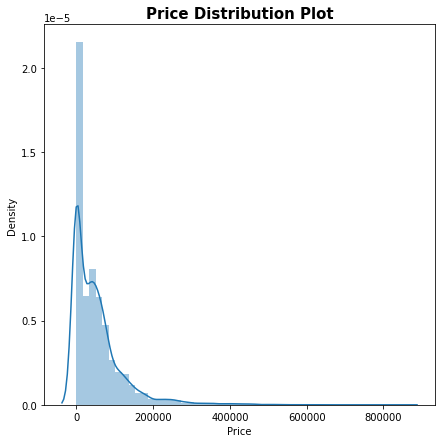

In [3]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Price'])
plt.title('Price Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi harga mobil bekas saudi arabia di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur price.

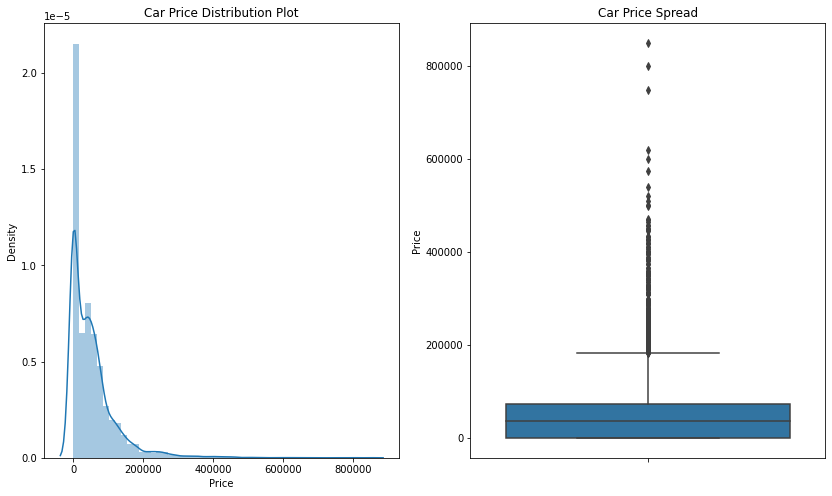

In [4]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.Price)
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.Price)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()

In [5]:
print(df.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      5624.000000
mean      53074.058144
std       70155.340614
min           0.000000
25%           0.000000
50%       36500.000000
75%       72932.500000
85%      104275.000000
90%      128850.000000
100%     850000.000000
max      850000.000000
Name: Price, dtype: float64


Insights :
- The plot seemed to be right-skewed, meaning that the most prices in the dataset are relatively low (Below 73.000).
- There is a significant difference between the mean and the median of the price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices. (85% of the prices are below 130,000, whereas the remaining 15% are between 104.275 and 850.000)

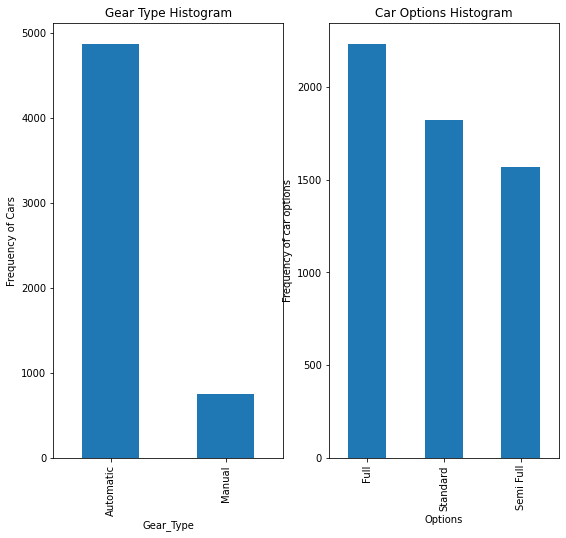

In [6]:
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
plt1 = df.Gear_Type.value_counts().plot(kind='bar')
plt.title('Gear Type Histogram')
plt1.set(xlabel = 'Gear_Type', ylabel='Frequency of Cars')

plt.subplot(1,3,2)
plt1 = df.Options.value_counts().plot(kind='bar')
plt.title('Car Options Histogram')
plt1.set(xlabel = 'Options', ylabel='Frequency of car options')

plt.show()

Insights:
- Jumlah mobil bekas dengan Gear Type 'Automatic' sangat tinggi dibandingkan dengan mobil 'Manual'.
- Opsi kendaraan 'Ful' tampaknya lebih disukai untuk penjualan mobil daripada opsi lainnya.

In [7]:
# Cek jumlah merek mobil bekas yang dijual berdasarkan region-nya
print(f"Jumlah mobil bekas yang dijual di tiap region:\n{df['Region'].value_counts()}")

Jumlah mobil bekas yang dijual di tiap region:
Riyadh            2272
Dammam             925
Jeddah             733
Qassim             225
Al-Medina          214
Al-Ahsa            166
Aseer              163
Makkah             153
Taef               103
Tabouk              97
Khobar              76
Abha                64
Jazan               60
Hail                58
Jubail              56
Najran              42
Hafar Al-Batin      39
Al-Baha             35
Yanbu               27
Al-Jouf             27
Arar                22
Besha               16
Qurayyat            13
Al-Namas            12
Wadi Dawasir        12
Sakaka              10
Sabya                4
Name: Region, dtype: int64


Text(0, 0.5, 'Count of Cars')

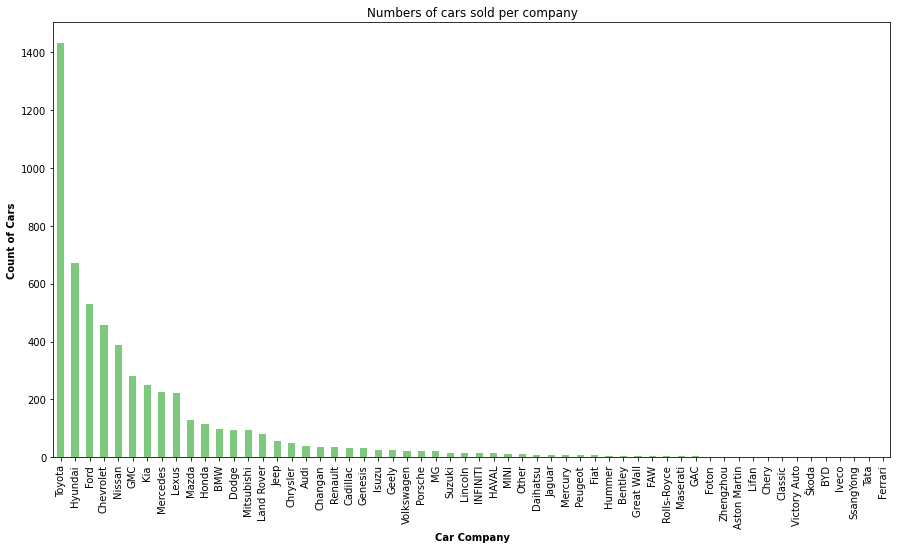

In [8]:
# Visualizing the different car company names available

plt.rcParams['figure.figsize'] = [15,8]
ax = df['Make'].value_counts().plot(kind='bar', colormap = 'Accent')
ax.title.set_text('Numbers of cars sold per company')
plt.xlabel("Car Company",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

Insights:
- Toyota, Hyundai, and Ford are among the most cars sold as used cars.
- SsangYong, Tata, and Ferrari are the lowest sold cars.

In [9]:
print(f"\nJumlah tiap mobil bekas berdasarkan brand atau merek:\n{df['Make'].value_counts()}")
print(f"\nJumlah tiap mobil bekas berdasarkan tipe gearnya:\n{df['Gear_Type'].value_counts()}")


Jumlah tiap mobil bekas berdasarkan brand atau merek:
Toyota          1431
Hyundai          670
Ford             530
Chevrolet        458
Nissan           387
GMC              282
Kia              251
Mercedes         226
Lexus            222
Mazda            129
Honda            115
BMW               97
Dodge             95
Mitsubishi        94
Land Rover        79
Jeep              56
Chrysler          50
Audi              38
Changan           36
Renault           35
Cadillac          31
Genesis           31
Isuzu             25
Geely             24
Volkswagen        23
Porsche           22
MG                21
Suzuki            16
Lincoln           16
INFINITI          15
HAVAL             14
MINI              11
Other             10
Daihatsu           9
Jaguar             9
Mercury            9
Peugeot            8
Fiat               7
Hummer             5
Bentley            4
Great Wall         4
FAW                4
Rolls-Royce        3
Maserati           3
GAC                3


Kebanyakan mobil bekas yang dijual berlokasi di **Riyadh** dengan merek mobil yang paling banyak dijual adalah **Toyota** serta tipe gear didominasi oleh **Automatic**.

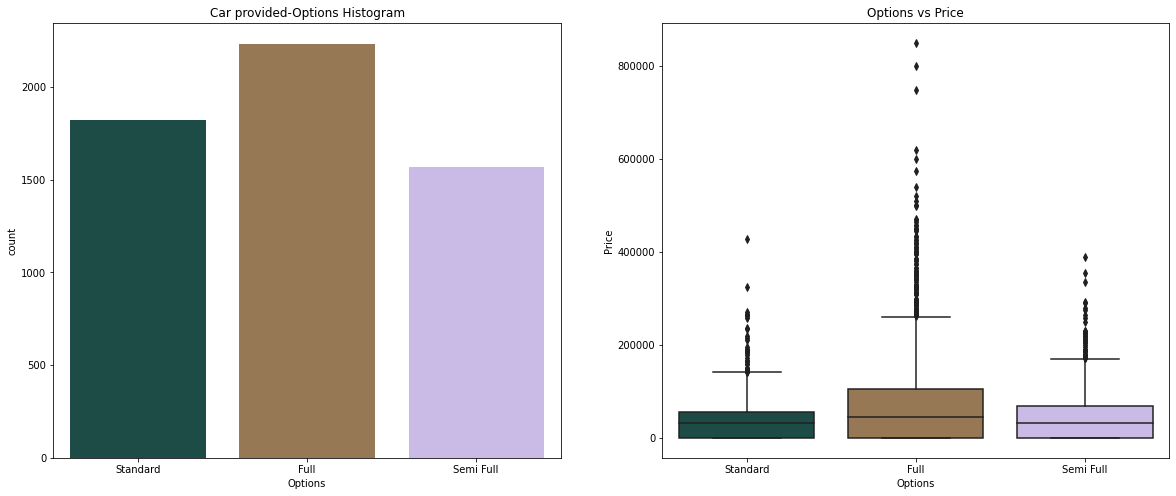

In [10]:
# To view the relationship between Car Options and the price
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car provided-Options Histogram')
sns.countplot(df.Options, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Options vs Price')
sns.boxplot(x=df.Options, y=df.Price, palette=("cubehelix"))

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

`Full Options` cars has higher spread out in price compared to the other options.

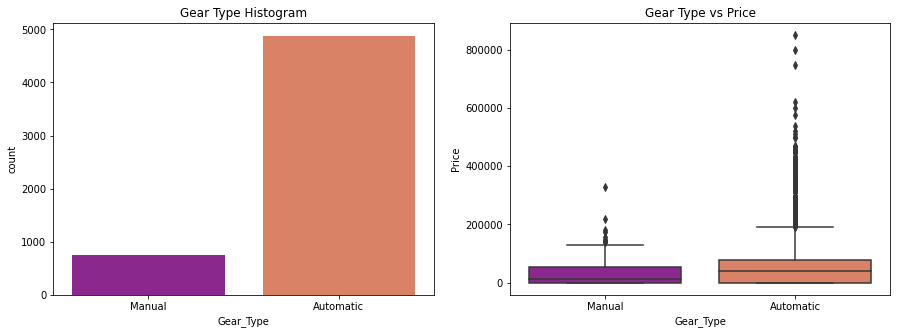

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gear Type Histogram')
sns.countplot(df.Gear_Type, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Gear Type vs Price')
sns.boxplot(x=df.Gear_Type, y=df.Price, palette=("plasma"))

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

Only few `Manual` cars are being sold. Furthermore, the average price of Manual and Automatic cars `differs` significantly.

In [12]:
# Grouping merek mobil bekas berdasarkan region
df.groupby(['Region', 'Make'])['Make'].count().sort_values(ascending=False)

Region   Make      
Riyadh   Toyota        491
         Hyundai       327
Dammam   Toyota        251
Riyadh   Ford          211
         Chevrolet     197
                      ... 
Makkah   Bentley         1
         Changan         1
Al-Baha  Mitsubishi      1
Makkah   Chrysler        1
Abha     BMW             1
Name: Make, Length: 466, dtype: int64

Untuk di daerah Riyadh, mobil bekas yang paling banyak terjual adalah mobil dengan merek Toyota kemudian disusul dengan merek Hyundai. Kemudian untuk daerah Dammam, mobil bekas yang paling banyak terjual adalah mobil dengan merek Toyota.

<Figure size 1440x576 with 0 Axes>

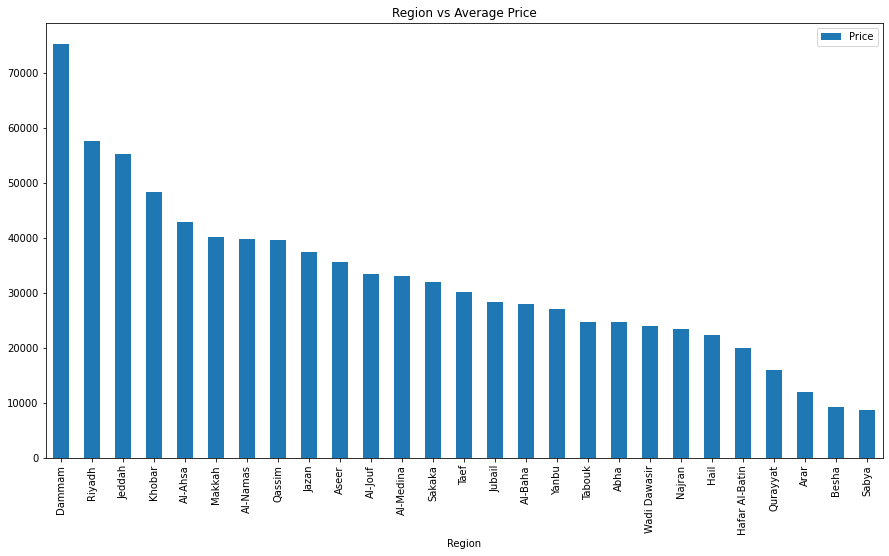

In [13]:
plt.figure(figsize=(20,8))

df_rp = pd.DataFrame(df.groupby(['Region'])['Price'].mean().sort_values(ascending = False))
df_rp.plot.bar()
plt.title('Region vs Average Price')
plt.show()

In [14]:
# Cek median price untuk tiap region
df_median_price = df.groupby(by=['Region']).agg({'Price':'median'}).reset_index()
df_median_price = df_median_price.set_index('Region')
df_median_price = df_median_price.sort_values('Price', ascending =False)
df_median_price.head()
df_median_price.head()

,Price
Region,
Dammam,55000.0
Riyadh,42000.0
Jeddah,38000.0
Al-Ahsa,37750.0
Al-Namas,36000.0


Dammam, Riyadh, and Jeddah cities where the cars are moslty sold.

<Figure size 1800x432 with 0 Axes>

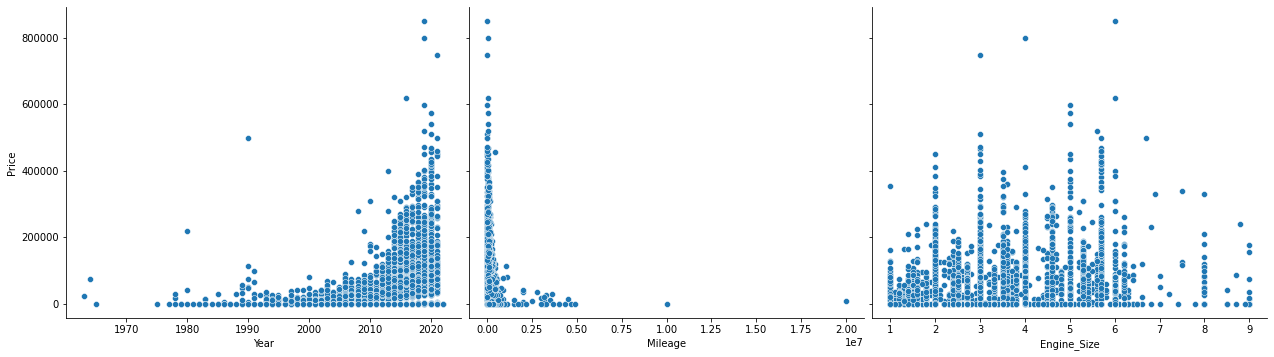

In [15]:
plt.figure(figsize=(25, 6))
sns.pairplot(df, x_vars=['Year', 'Mileage', 'Engine_Size'], y_vars='Price',size=5, aspect=1.2, kind='scatter')
plt.show()

Inference:
- `Year` of manufacting seems to have a positive correlation with price, which is expected.
- `Mileage` appears to have a negative correlation with price.
- `Engine_Size` have a week correlation with the price.

<Figure size 1440x432 with 0 Axes>

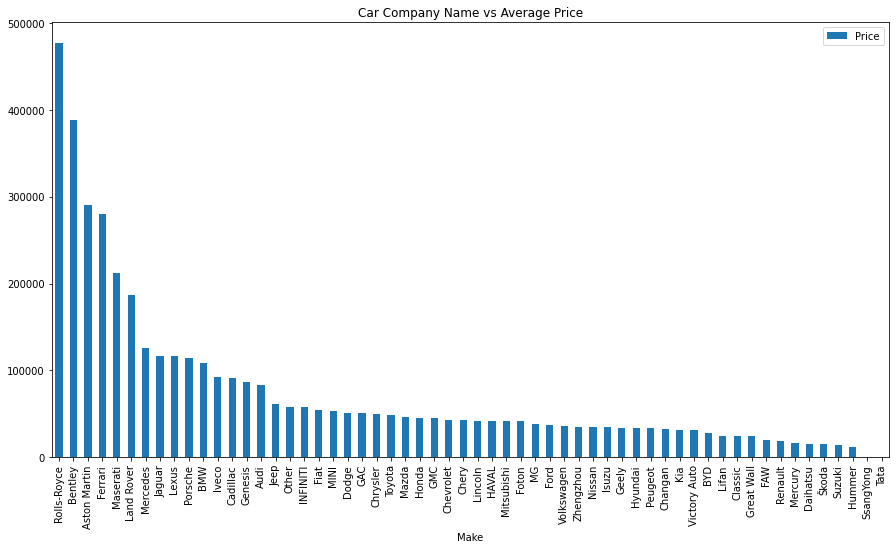

In [16]:
plt.figure(figsize=(20, 6))

df_bp = pd.DataFrame(df.groupby(['Make'])['Price'].mean().sort_values(ascending = False))
df_bp.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

Insights:
- Rolls-Royce, Bentley, and Aston Martin have the highest average price.
- SsangYong and Tata are cheapest sold cars.

Make,Aston Martin,Audi,BMW,BYD,Bentley,Cadillac,Changan,Chery,Chevrolet,Chrysler,...,Renault,Rolls-Royce,SsangYong,Suzuki,Tata,Toyota,Victory Auto,Volkswagen,Zhengzhou,Škoda
Region,,,,,,,,,,,,,,,,,,,,,
Abha,NaN,NaN,34000.0,NaN,NaN,NaN,NaN,NaN,49500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Al-Ahsa,NaN,NaN,192450.0,NaN,NaN,56500.0,31000.0,NaN,12000.0,70000.0,...,1128.0,NaN,NaN,0.0,NaN,15000.0,NaN,27000.0,NaN,NaN
Al-Baha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87500.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,35000.0,NaN
Al-Jouf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Al-Medina,NaN,40000.0,63000.0,28000.0,NaN,41000.0,NaN,NaN,7000.0,NaN,...,NaN,NaN,NaN,22000.0,NaN,0.0,NaN,0.0,NaN,NaN
Al-Namas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70000.0,NaN,NaN,NaN,NaN
Arar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Aseer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29000.0,23000.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Besha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


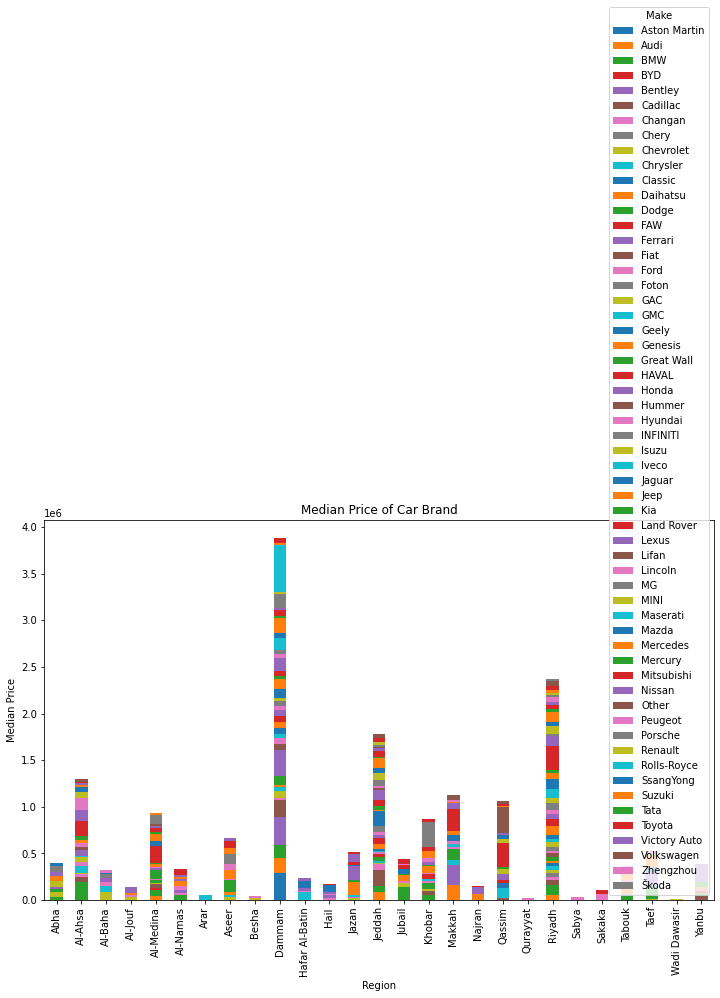

In [17]:
# Plot harga median untuk tiap merek mobil bekas di setiap Region
from IPython.display import display

neighbour_pivot = df.pivot_table(index='Region', columns='Make', values='Price', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Region')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price of Car Brand');

*Insight:* Region Dammam memiliki harga median tertinggi untuk tiap merek kendarran. 

Gear_Type,Automatic,Manual
Region,,
Abha,1010.0,0.0
Al-Ahsa,40500.0,0.0
Al-Baha,15000.0,0.0
Al-Jouf,13000.0,0.0
Al-Medina,22500.0,0.0
Al-Namas,30000.0,45000.0
Arar,0.0,42500.0
Aseer,16500.0,0.0
Besha,0.0,0.0


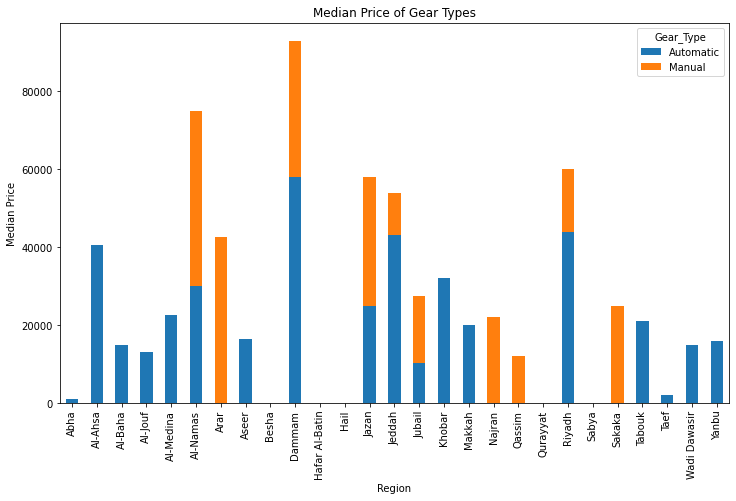

In [18]:
# Plot harga median untuk tiap gear tipe di setiap Region
from IPython.display import display

neighbour_pivot = df.pivot_table(index='Region', columns='Gear_Type', values='Price', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Region')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price of Gear Types');

*Insight:* Region Dammam memiliki harga median tertinggi untuk tiap gear type dari kendaraan bekas yang dijual, yang mana gear type jenis Automatic mencapai 2 kali lipat harga untuk tipe mobil manual.

Gear_Type,Automatic,Manual
Make,,
Aston Martin,290000.0,NaN
Audi,70750.0,NaN
BMW,80000.0,NaN
BYD,28000.0,NaN
Bentley,265000.0,NaN
Cadillac,50000.0,NaN
Changan,34750.0,NaN
Chery,42500.0,NaN
Chevrolet,32000.0,7500.0


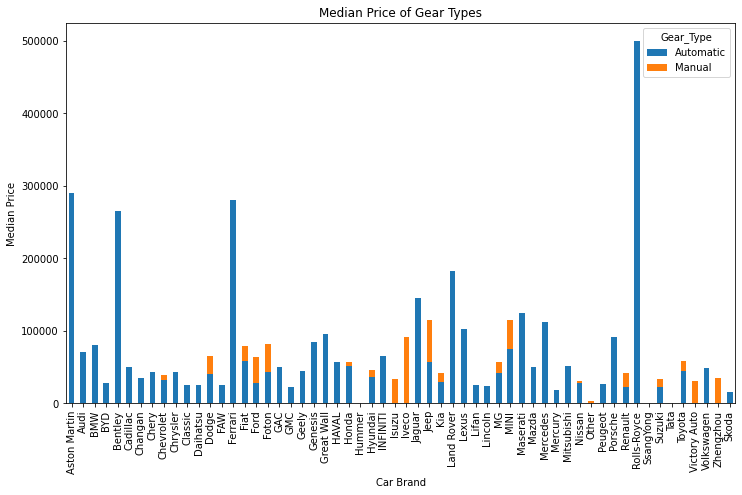

In [19]:
# Plot harga median untuk tiap gear tipe di setiap merek saudi used car
from IPython.display import display

neighbour_pivot = df.pivot_table(index='Make', columns='Gear_Type', values='Price', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Car Brand')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price of Gear Types');

*Insight:* Mobil dengan merek Rolls-Royce memiliki harga median tertinggi dibandingkan dengan merek mobil-mobil lainnya, terlebih untuk tipe gear kendaraan 'Automatic' sangat mendominasi tampilan plot diatas.

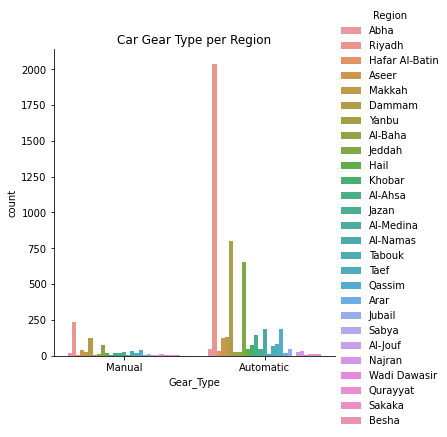

In [20]:
# Persebaran gear tipe mobil berdasarkan Region
sns.catplot(x='Gear_Type', kind='count', hue='Region', data=df);
plt.title('Car Gear Type per Region');

*Insight:* Plot diatas merupakan validasi bahwa gear type jenis 'Automatic' sangat mendominasi sebaran penjualan mobil bekas di Saudi Arabia dibandingkan dengan type gear 'Manual'.

In [21]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [22]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[Patrol, GTB 599 Fiorano]"
1,Region,object,0,0.0,27,"[Tabouk, Dammam]"
2,Make,object,0,0.0,58,"[GAC, Lexus]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Saudi, Gulf Arabic]"
5,Options,object,0,0.0,3,"[Standard, Semi Full]"
6,Year,int64,0,0.0,50,"[2016, 2010]"
7,Engine_Size,float64,0,0.0,71,"[3.6, 8.8]"
8,Mileage,int64,0,0.0,1716,"[3150000, 164]"
9,Negotiable,bool,0,0.0,2,"[False, True]"


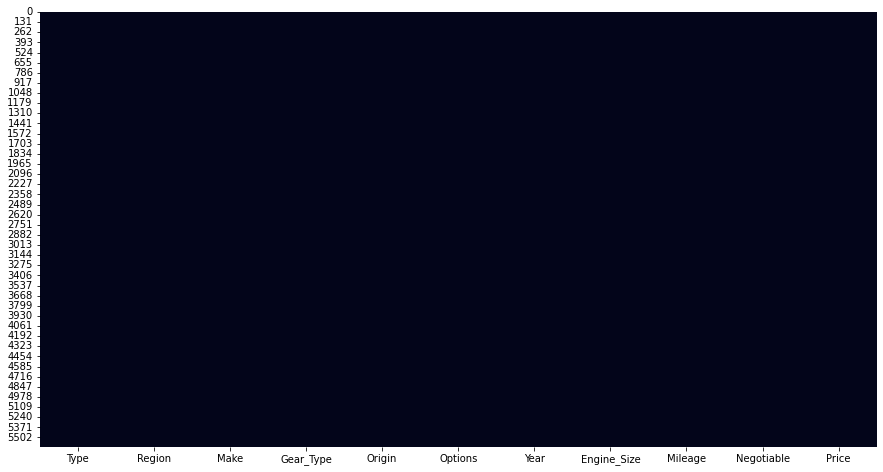

In [23]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Dari info dataset di atas, tidak terdapat data yang kosong pada fitur-fitur atau kolom dataset Saudi Arabia Used Cars. Kemudian dari hasil pencitraan menggunakan heatmap juga tidak terdapat missing value pada dataset yang digunakan.

### **Data Preprocessing**

In [24]:
# 'Negotiable' column is not necessary for analysis, so I will delete it
df_model = df_model.drop(['Negotiable'], axis=1)

# 'Mileage' column with 9999999 and 20000000 are not necessary for analysis, so I will delete it
df_model = df_model[(df_model['Mileage'] != 9999999)&(df_model['Mileage'] != 20000000)]
df_model.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,0


In [25]:
# Summary Statistics for numerical attrubires

# df_model.describe()

num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,Year,Engine_Size,Mileage,Price
count,5622.000000,5622.000000,5.622000e+03,5622.000000
mean,2014.108324,3.294895,1.456409e+05,53091.338136
std,5.777359,1.513909,2.433893e+05,70161.784561
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2013.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.959142e+05,72977.500000
max,2022.000000,9.000000,4.900000e+06,850000.000000


Dari fitur-fitur diatas, fitur 'price' dirasa tidak masuk akal kalau nilainya 0. Itu berarti showroom mobil bekas Saudi Arabia menjual mobil-nya secara gratis. Oleh karena itu, data yang memiliki nilai Price = 0 lebih baik kita drop.

In [26]:
# Summary Statistics for categorical variables
df_model.describe(exclude="number")

,Type,Region,Make,Gear_Type,Origin,Options
count,5622,5622,5622,5622,5622,5622
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2271,1431,4875,4188,2232


Dari fitur-fitur diatas, fitur Type didominasi oleh merek mobil 'Land Cruiser' untuk penjualan mobil bekas terbanyak, kemudian di ikuti informasi seputar fitur-fitur yang lain.

In [27]:
# To check rows with Price represented as'0'.
df_model[df_model.Price == 0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,0
...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,0


In [28]:
# To check rows with Price represented as'1'.
df_model[df_model.Price == 1]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1


In [29]:
# Dropping the rows having price equal to zero and equal to one
df_model = df_model[(df_model['Price'] != 0)&(df_model['Price'] != 1)]

In [30]:
df_model

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


To check the values in price column. Let's sort the colunm in an ascending order.

In [31]:
df_model.sort_values(by='Price', ascending=1, inplace=True)
df_model.head(20)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950
3760,5,Al-Ahsa,MG,Automatic,Saudi,Standard,2020,1.5,41000,988
3616,Elantra,Jeddah,Hyundai,Automatic,Saudi,Standard,2019,2.0,89000,993
1534,Yukon,Jeddah,GMC,Automatic,Saudi,Standard,2021,5.3,4000,1000
3892,Corolla,Hail,Toyota,Automatic,Saudi,Standard,2020,1.6,48563,1002
46,Elantra,Abha,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,27000,1010
5424,Yaris,Najran,Toyota,Automatic,Saudi,Full,2018,1.5,169000,1046


In [32]:
# Cek data duplikat
df_model.duplicated().sum()

3

In [33]:
duplicate = df_model[df_model.duplicated()]
duplicate

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
540,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,25000
2012,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,45000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,72910


**Drop Columns** <br>
Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
- Jika ditinjau berdasar domain knowledge, fitur 'Type', 'Region', dan ' Origin' tidak memiliki relevansi dan kepentingan untuk analisis prediktif.
- Fitur 'Negotiable' juga tidak diperlukan untuk membangun model prediktif.

In [34]:
# Drop beberapa kolom yang tidak diperlukan
df_model.drop(['Make','Type','Region','Origin'], axis=1, inplace=True)

In [35]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3825 entries, 3992 to 3513
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gear_Type    3825 non-null   object 
 1   Options      3825 non-null   object 
 2   Year         3825 non-null   int64  
 3   Engine_Size  3825 non-null   float64
 4   Mileage      3825 non-null   int64  
 5   Price        3825 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 209.2+ KB


Sekarang kolom 'Type', 'Region', ' Origin', dan 'Negotiable' sudah tidak ada.

**Missing Value**

In [36]:
# Cek nilai missing value
df_model.isnull().sum()

Gear_Type      0
Options        0
Year           0
Engine_Size    0
Mileage        0
Price          0
dtype: int64

Dari output diatas tidak terdapat missing value terhadap dataset saudi arabia used cars yang di gunakan.

In [37]:
display(df.head(2))
display(df_model.head(2))

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000


,Gear_Type,Options,Year,Engine_Size,Mileage,Price
3992,Automatic,Semi Full,2018,3.8,170000,500
4399,Automatic,Standard,2018,1.5,100000,850


In [38]:
# Cek kembali dataset info
df_model.isna().sum()

Gear_Type      0
Options        0
Year           0
Engine_Size    0
Mileage        0
Price          0
dtype: int64

In [39]:
# Cek harga sewa yang bernilai 0
df_model[df_model['Price'] == 0]['Price'].count()

0

Kita lakukan pengecekan ulang terhadap dataset yang digunakan, dan hasilnya tidak ditemukan missing value serta untuk data dengan Price = 0 juga sudah tidak ada. Artinya dataset yang sudah kita lakukan tahap preprocessing bisa lanjut ketahap berikutnya.

**Data Correlation**

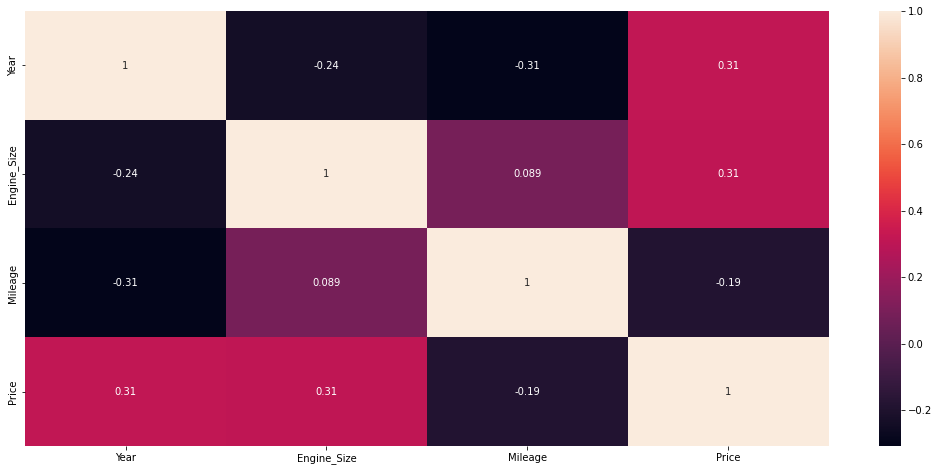

In [40]:
# to check the correlation coefficients to see which variables are highly correlated

import seaborn as sns
plt.figure(figsize=(18,8))
sns.heatmap(df_model.corr(),annot=True)
plt.show()

# # Correlation matrix
# plt.figure(figsize=(15, 12))
# palette=sns.diverging_palette(20, 220, n=256)
# corr = df_model.corr(method='pearson')
# sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
# plt.title('Correlation Matrix', size=15, weight='bold');

In [41]:
# Another way to calculate the correlation

df_model.corr()["Price"].sort_values() # Price is the target variable

Mileage       -0.189847
Engine_Size    0.308919
Year           0.314313
Price          1.000000
Name: Price, dtype: float64

From the heatmap
- Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur price.
- Namun kita dapat melihat bahwa the Year and Engine_Size secara positif memiliki korelasi terhadap Price. Sedangkan Mileage berkorelasi secara negatif.

Selanjutnya kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

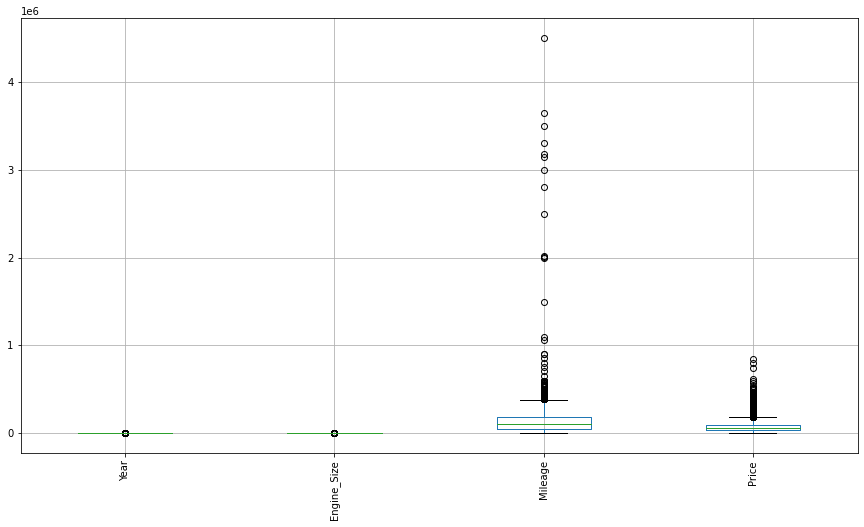

In [42]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terlihat banyak sekali outliers pada beberapa fitur seperti Mileage. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [43]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [44]:
# Outliers pada fitur price
find_anomalies(df_model['Price'])

IQR: 59000.0
limit_bawah: -53500.0
limit_atas: 182500.0


In [45]:
# Outliers pada fitur Mileage
find_anomalies(df_model['Mileage'])

IQR: 135000.0
limit_bawah: -154500.0
limit_atas: 385500.0


In [46]:
# Outliers pada fitur Engine_Size
find_anomalies(df_model['Engine_Size'])

IQR: 2.0
limit_bawah: -1.0
limit_atas: 7.0


In [47]:
# Outliers pada fitur Year
find_anomalies(df_model['Year'])

IQR: 5.0
limit_bawah: 2005.5
limit_atas: 2025.5


### **Feature Engineering**

Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**Price**

In [48]:
# Cek deskriptif statistik kolom price
df_model['Price'].describe()

count      3825.000000
mean      78033.856732
std       72726.222213
min         500.000000
25%       35000.000000
50%       58000.000000
75%       94000.000000
max      850000.000000
Name: Price, dtype: float64

In [49]:
# Cek price > $182500
df_model[df_model['Price'] > 182500.0].count()['Price']

261

Terlihat bahwa 75% data pada kolom price bernilai kurang dari 94000, sedangkan nilai maksimalnya adalah 850000. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 261 data yang nilai price-nya lebih besar dari 182500 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki price lebih besar dari 182500 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

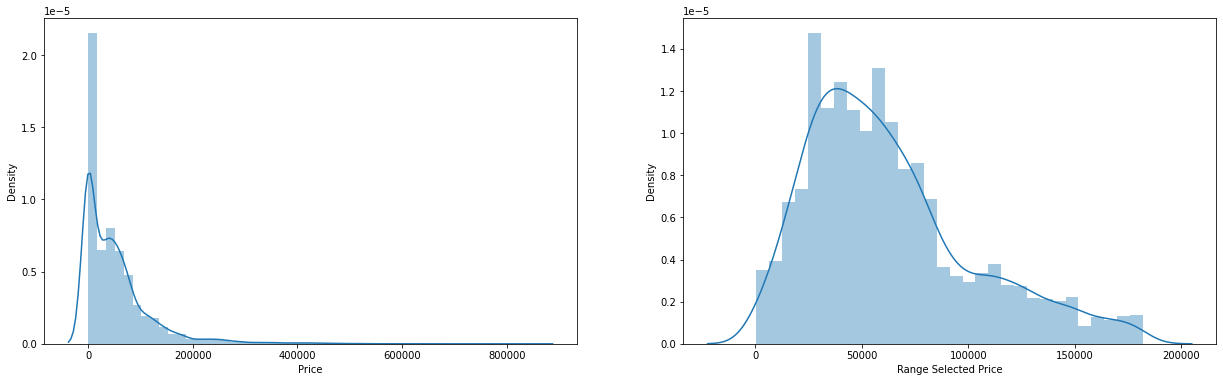

In [50]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Price'] <= 182500)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Price'], ax=axes[0])
sns.distplot(df_model['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

In [51]:
# Cek deskriptif statistik kolom 'Price' setelah filtering
df_model['Price'].describe()

count      3564.000000
mean      62888.356341
std       39305.438559
min         500.000000
25%       35000.000000
50%       55000.000000
75%       81500.000000
max      182000.000000
Name: Price, dtype: float64

**Engine_Size**

In [52]:
df_model['Engine_Size'].describe()

count    3564.000000
mean        3.107744
std         1.436205
min         1.000000
25%         2.000000
50%         2.700000
75%         4.000000
max         9.000000
Name: Engine_Size, dtype: float64

In [53]:
# Cek Engine_Size > 7
df_model[df_model['Engine_Size'] > 7].count()['Engine_Size']

26

Terlihat bahwa 75% data pada kolom Engine_Size bernilai kurang dari 4, sedangkan nilai maksimalnya adalah 9. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 26 data yang nilai Engine_Size-nya lebih besar dari 7 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki nilai Engine_Size lebih besar dari 7 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

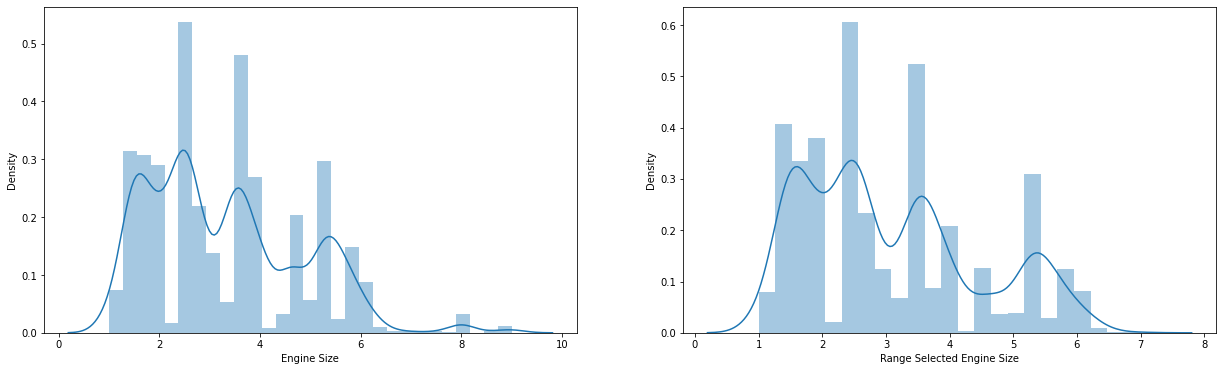

In [54]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Engine_Size'] <= 7)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Engine_Size'], ax=axes[0])
sns.distplot(df_model['Engine_Size'], ax=axes[1])
axes[0].set_xlabel('Engine Size')
axes[1].set_xlabel('Range Selected Engine Size');

In [55]:
# Cek deskriptif statistik kolom 'Engine_Size' setelah filtering
df_model['Engine_Size'].describe()

count    3538.000000
mean        3.070266
std         1.372348
min         1.000000
25%         2.000000
50%         2.700000
75%         4.000000
max         7.000000
Name: Engine_Size, dtype: float64

**Mileage**

In [56]:
df_model['Mileage'].describe()

count    3.538000e+03
mean     1.436667e+05
std      2.059517e+05
min      1.000000e+02
25%      5.400000e+04
50%      1.080000e+05
75%      1.900000e+05
max      4.500000e+06
Name: Mileage, dtype: float64

In [57]:
# Cek jumlah nilai Mileage > 385500
df_model[df_model['Mileage'] > 385500].count()['Mileage']

129

Terlihat bahwa 75% data pada kolom Mileage bernilai kurang dari 1.900000e+05, sedangkan nilai maksimalnya adalah 4.500000e+06. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 129 data yang nilai Mileage-nya lebih besar dari 385500 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki nilai Mileage lebih besar dari 385500 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

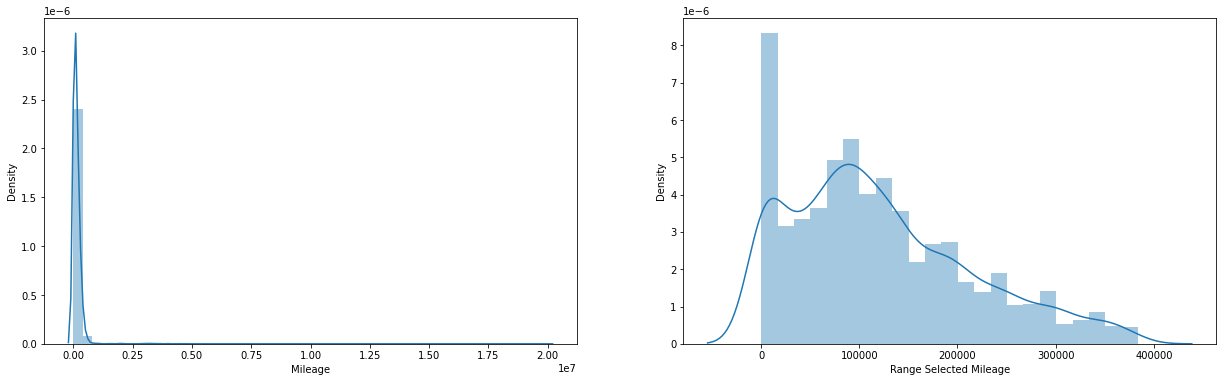

In [58]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Mileage'] < 385500)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Mileage'], ax=axes[0])
sns.distplot(df_model['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage');

**Year**

Meskipun batas atas berdasarkan metode IQR untuk fitur 'Year' adalah 25.5, namun ternyata jumlah data yang lebih besar dari 2025.5 tidak ada atau 0. Oleh karena itu data yang akan dimasukan adalah fitur Year yang memiliki nilai dibawah atau kurang dari 2025.5

In [59]:
# Cek deskriptif statistik kolom Year
df_model['Year'].describe()

count    3409.000000
mean     2014.955119
std         4.823594
min      1963.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: Year, dtype: float64

In [60]:
# Cek Year > $2025.5
df_model[df_model['Year'] > 2025.5].count()['Year']

0

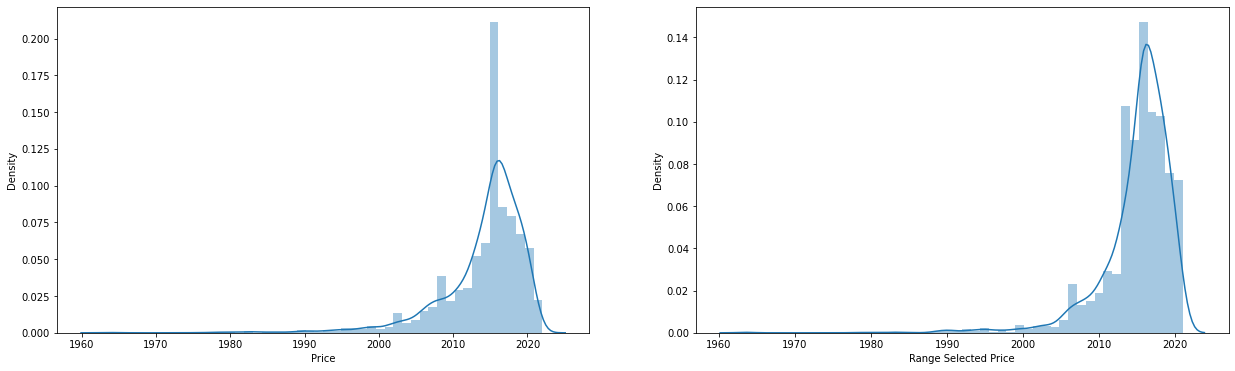

In [61]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Year'] <= 2025.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Year'], ax=axes[0])
sns.distplot(df_model['Year'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

In [62]:
# Cek deskriptif statistik kolom 'Year' 
df_model['Year'].describe()

count    3409.000000
mean     2014.955119
std         4.823594
min      1963.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: Year, dtype: float64

**Gear_Type**

In [63]:
# Cek deskriptif statistik kolom Gear_Type
df_model['Gear_Type'].describe()

count          3409
unique            2
top       Automatic
freq           3058
Name: Gear_Type, dtype: object

**Options**

In [64]:
# Cek deskriptif statistik kolom Options
df_model['Options'].describe()

count         3409
unique           3
top       Standard
freq          1270
Name: Options, dtype: object

**Clean Dataset**

In [65]:
df_model

,Gear_Type,Options,Year,Engine_Size,Mileage,Price
3992,Automatic,Semi Full,2018,3.8,170000,500
4399,Automatic,Standard,2018,1.5,100000,850
5128,Automatic,Standard,2019,1.4,55500,884
3474,Automatic,Standard,2019,1.6,85000,950
3760,Automatic,Standard,2020,1.5,41000,988
...,...,...,...,...,...,...
2852,Automatic,Full,2020,3.5,5000,180000
4725,Automatic,Full,2017,2.0,20000,180000
1662,Automatic,Full,2015,5.7,119000,180000
2522,Automatic,Full,2019,3.6,16000,181000


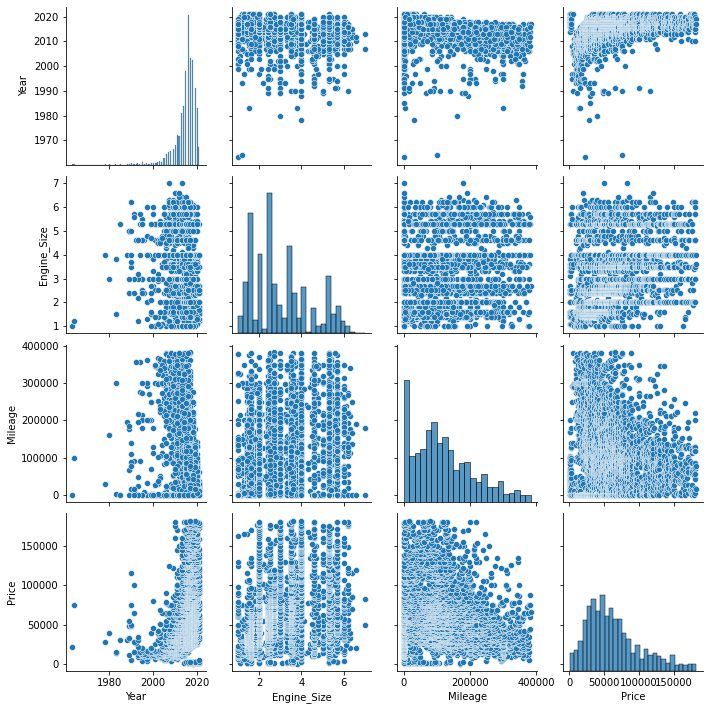

In [66]:
# plot relationships in the dataset
sns.pairplot(df_model)
plt.show()

### **Modeling**

In [67]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding** <br>

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [68]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type']),
    ('Ordinal', ce.OrdinalEncoder(), ['Options'])
], remainder='passthrough')

In [69]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(drop='first'),
                                 ['Gear_Type']),
                                ('Ordinal', OrdinalEncoder(), ['Options'])])

In [70]:
data_transformer = pd.DataFrame(transformer.fit_transform(df_model))
data_transformer

,0,1,2,3,4,5
0,0.0,1.0,2018.0,3.8,170000.0,500.0
1,0.0,2.0,2018.0,1.5,100000.0,850.0
2,0.0,2.0,2019.0,1.4,55500.0,884.0
3,0.0,2.0,2019.0,1.6,85000.0,950.0
4,0.0,2.0,2020.0,1.5,41000.0,988.0
...,...,...,...,...,...,...
3404,0.0,3.0,2020.0,3.5,5000.0,180000.0
3405,0.0,3.0,2017.0,2.0,20000.0,180000.0
3406,0.0,3.0,2015.0,5.7,119000.0,180000.0
3407,0.0,3.0,2019.0,3.6,16000.0,181000.0


**Data Splitting**

In [71]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Price'], axis=1)
y = df_model['Price']

In [72]:
display(X)
display(y)

,Gear_Type,Options,Year,Engine_Size,Mileage
3992,Automatic,Semi Full,2018,3.8,170000
4399,Automatic,Standard,2018,1.5,100000
5128,Automatic,Standard,2019,1.4,55500
3474,Automatic,Standard,2019,1.6,85000
3760,Automatic,Standard,2020,1.5,41000
...,...,...,...,...,...
2852,Automatic,Full,2020,3.5,5000
4725,Automatic,Full,2017,2.0,20000
1662,Automatic,Full,2015,5.7,119000
2522,Automatic,Full,2019,3.6,16000


3992       500
4399       850
5128       884
3474       950
3760       988
         ...  
2852    180000
4725    180000
1662    180000
2522    181000
2605    182000
Name: Price, Length: 3409, dtype: int64

**Train and Test Splitting**

In [73]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

In [74]:
X_train, X_test, y_train, y_test

(      Gear_Type    Options  Year  Engine_Size  Mileage
 1666  Automatic   Standard  2021          2.5    10000
 2692  Automatic       Full  2004          3.0   230000
 2868  Automatic  Semi Full  2020          4.0     3000
 2506  Automatic       Full  2015          3.5    92000
 3678  Automatic       Full  2005          5.7   300000
 ...         ...        ...   ...          ...      ...
 1821  Automatic       Full  2018          2.5    42000
 641   Automatic  Semi Full  2011          4.0      289
 1065  Automatic   Standard  2019          1.4    72500
 3169  Automatic   Standard  2010          6.0      244
 2836  Automatic   Standard  2019          1.4    33000
 
 [2386 rows x 5 columns],
       Gear_Type    Options  Year  Engine_Size  Mileage
 1839  Automatic       Full  2012          4.8   106000
 3209  Automatic  Semi Full  2017          2.7    70000
 4336  Automatic       Full  2014          4.0   161000
 299   Automatic   Standard  2020          1.5    55531
 201   Automatic  Se

**Choose a Benchmark Model**

In [75]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-30696.92052867 -31726.34402807 -33648.16839282 -29564.25538345
 -34538.52414854] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-21024.82793344 -22028.33119229 -23201.71245787 -20054.42463067
 -24110.4384758 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.06606717 -1.5835488  -1.27345434 -0.66954904 -1.18444612] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-28389.12599806 -30928.82300468 -30780.26750205 -27929.99162582
 -30078.28232529] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-19569.65874035 -21016.73479668 -20643.82275696 -18752.00424041
 -20210.62691887] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [76]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-32034.842496,1836.314213,-22083.946938,1456.011997,-1.155413,0.297363
1,KNN Regressor,-29621.298091,1236.157895,-20038.569491,803.476207,-1.106102,0.382567
2,DecisionTree Regressor,-33903.242850,1829.505963,-21997.529694,1233.100331,-1.199278,0.396538
3,RandomForest Regressor,-28133.131886,2429.925953,-18329.500297,1367.574331,-1.009091,0.375559
4,XGBoost Regressor,-31630.034674,2936.954358,-20322.397942,1363.409964,-1.138366,0.406342


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, RandomForest Regressor adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [77]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,27757.166479,18307.659922,1.218682
RandomForest,26036.501689,16872.744815,1.166718


- Ketika dilakukan prediksi pada test set, performa Random Forest secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari XGBoost.

**Hyperparameter Tuning**

Karena model XGBoost tidak memiliki performa berbeda jauh dengan Random Forest, maka selanjutnya kita akan tetap menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [78]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [79]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [80]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['Options'])])),
                                             ('scaler', StandardScaler()),
                                            

In [81]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,1.539319,0.071707,0.012930,0.001553,0.6,0.001,190,5,0.04,9,...,906.051482,1,-1.152578,-1.779178,-1.241305,-0.623073,-1.269267,-1.213080,0.367747,2
24,0.605172,0.019232,0.011594,0.000800,0.9,10.0,146,4,0.06,5,...,979.867087,3,-1.179434,-1.778555,-1.298257,-0.660814,-1.257178,-1.234848,0.355731,7
7,1.520932,0.144406,0.014592,0.004077,0.9,0.059948,119,8,0.05,5,...,1139.433472,2,-1.153135,-1.723778,-1.213538,-0.631897,-1.288655,-1.202201,0.348511,1
0,0.546839,0.017115,0.009374,0.007654,0.7,0.007743,144,2,0.68,10,...,1060.601535,4,-1.206998,-1.792693,-1.165144,-0.630311,-1.275532,-1.214136,0.369270,3
42,0.642595,0.016094,0.009719,0.003383,0.3,3.593814,118,6,0.18,6,...,710.524509,6,-1.115475,-1.836347,-1.276889,-0.713319,-1.304840,-1.249374,0.361567,9


In [82]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -25623.271851956117
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [83]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,24771.493989,16345.332482,1.205954


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [84]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,27757.166479,18307.659922,1.218682


In [85]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,24771.493989,16345.332482,1.205954


*Kesimpulan* : Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.

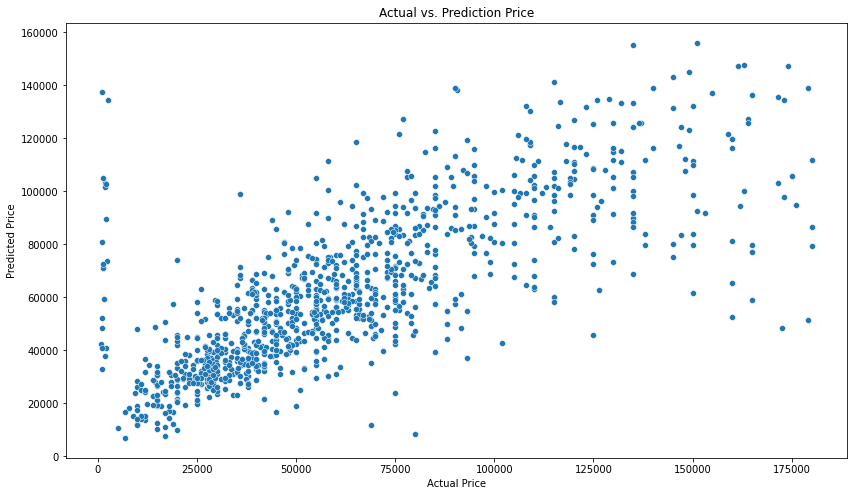

In [86]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 29% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (Price), kita dapat mengeceknya melalui function feature_importances_.

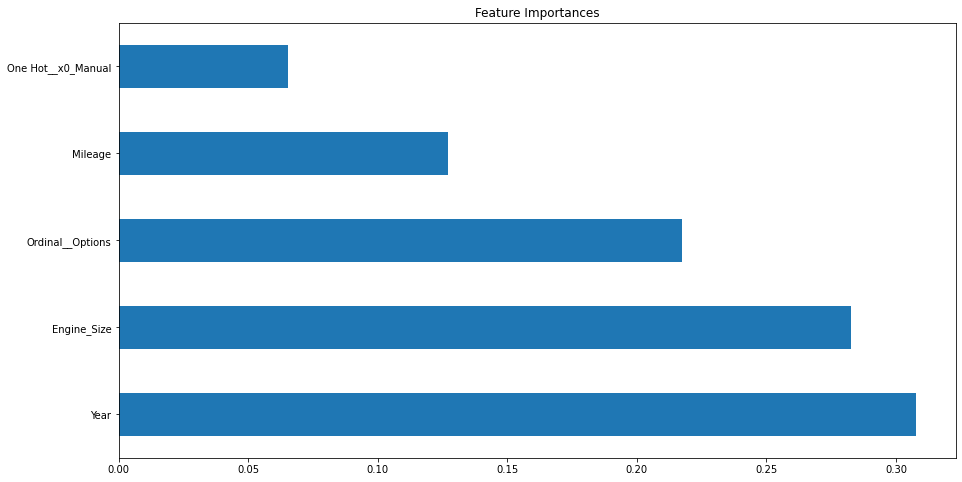

In [87]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

### **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'Year', 'Engine Size', 'Options', 'Mileage' dan 'Gear_Type : Manual' menjadi fitur yang paling berpengaruh terhadap 'price'.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai RMSE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning lebih besar dibandingkan dengan model sebelum dilakukan hyperparameter tuning. Kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga mobil bekas di Saudi Arabia pada rentang nilai seperti yang dilatih terhadap model, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar nilai 247.71 dari harga yang mungkin seharusnya. Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh kurangnya fitur pada dataset yang bisa merepresentasikan aspek-aspek lain dari mobil bekas yang dijual.



### **Recommendation**

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>   
2. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('price').
<br><br>   
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.

----------------------------

#### **Save Model**

In [88]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_RegresiSaudi_XGB.sav', 'wb'))

In [89]:
# Load model
filename = 'Model_RegresiSaudi_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [90]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

27779.483521437523